In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./cli_train.tsv',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 11 columns):
일자             20010 non-null int64
time           20010 non-null object
식사내용           20010 non-null object
매출일자           20010 non-null float64
수량             20010 non-null float64
일시             20010 non-null object
평균기온(°C)       20010 non-null float64
최저기온(°C)       20010 non-null float64
최고기온(°C)       20010 non-null float64
강수 계속시간(hr)    20010 non-null float64
일강수량(mm)       20010 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.7+ MB


In [3]:
df['year'] = (df['일자']/10000).astype(int)
df['month'] = (df['일자'] % 10000 /100).astype(int)
df['day'] = (df['일자'] % 100).astype(int)

In [4]:
df['weekday'] = pd.to_datetime(df['일자'], format='%Y%m%d').dt.dayofweek
df.drop(['일자'],axis=1,inplace=True)

In [5]:
df['year'] = (df['year']-min(df['year'])) / (max(df['year']) - min(df['year']))
df['month_sin'] = [np.sin(x*2*np.pi/12) for x in df['month']]
df['month_cos'] = [np.cos(x*2*np.pi/12) for x in df['month']]
df['day_sin'] = [np.sin(x*2*np.pi/31) for x in df['day']]
df['day_cos'] = [np.cos(x*2*np.pi/31) for x in df['day']]
df['weekday_sin'] = [np.sin(x*2*np.pi/7) for x in df['weekday']]
df['weekday_cos'] = [np.cos(x*2*np.pi/7) for x in df['weekday']]
df.drop(['month','day','weekday'], axis=1,inplace=True)

In [6]:
df = df.join(pd.get_dummies(df['time'], prefix='식사명'))
df.drop(['time'],axis=1, inplace=True)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
def tokenize(text):
    return text.split(',')
vectorizer = CountVectorizer(tokenizer=tokenize)
bow = vectorizer.fit_transform(df['식사내용']).toarray()
df = df.join(pd.DataFrame(bow,columns=vectorizer.get_feature_names()))
df.drop(['식사내용'], axis=1, inplace=True)
df.head()

,매출일자,수량,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),year,month_sin,...,휘),흑미밥,흑미밥(현장),흑임자밥,흑임자죽,흑콩견과류조림,흑콩밥,흑콩조림,흰죽,흰콩곤약조림
0,20030301.0,37.472924,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,20030301.0,19.566787,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,20030301.0,31.191336,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20030302.0,36.101083,2003-03-02,9.5,3.7,15.1,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,20030302.0,21.949458,2003-03-02,9.5,3.7,15.1,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.drop(['매출일자','일시'],axis=1,inplace=True)

In [9]:
df.drop(['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수 계속시간(hr)', '일강수량(mm)'],axis=1,inplace=True)

In [10]:
df.head()

,수량,year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,식사명_아침,식사명_저녁,...,휘),흑미밥,흑미밥(현장),흑임자밥,흑임자죽,흑콩견과류조림,흑콩밥,흑콩조림,흰죽,흰콩곤약조림
0,37.472924,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19.566787,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,0,1,...,0,0,0,0,0,0,0,0,0,0
2,31.191336,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.101083,0.0,1.0,6.123234e-17,0.394356,0.918958,-0.781831,0.623490,1,0,...,0,0,0,0,0,0,0,0,0,0
4,21.949458,0.0,1.0,6.123234e-17,0.394356,0.918958,-0.781831,0.623490,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
train_df, dev_df = train_test_split(df,test_size=0.2, random_state=10)
print(train_df.shape)
print(dev_df.shape)

(16008, 1887)
(4002, 1887)


In [12]:
train_y = train_df['수량']
train_x = train_df.drop(['수량'],axis=1)
dev_y = dev_df['수량']
dev_x = dev_df.drop(['수량'],axis=1)

In [13]:
from sklearn.metrics import mean_squared_error
import math

def train_and_predict(model,train_x,train_y,dev_x):
    model.fit(train_x, train_y)
    return model.predict(dev_x)

def evaluate(predict_y, actual_y):
    rmse = math.sqrt(mean_squared_error(actual_y, predict_y))
    print('RMSE:', round(np.mean(rmse), 4))

In [14]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [15]:
model = xgb.XGBRegressor(seed=10)

In [16]:
parameters = {
              'n_estimators':[150],
              'max_depth':[11],
              'learning_rate': [0.1],
              'min_child_weight':[7],
              'gamma': [0.4],
              'subsample':[0.8],
              'colsample_bytree':[0.8], 
               'reg_alpha': [1e-5,1e-2,0.1,1,100]
        
             }

In [17]:
#clf = GridSearchCV(model,parameters,verbose=1,n_jobs=10,cv=5)

In [18]:
#%%time
#clf.fit(train_x,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:  8.9min finished


CPU times: user 3min 32s, sys: 1.42 s, total: 3min 34s
Wall time: 12min 21s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=10,
       param_grid={'n_estimators': [150], 'max_depth': [11], 'learning_rate': [0.1], 'min_child_weight': [7], 'gamma': [0.4], 'subsample': [0.8], 'colsample_bytree': [0.8], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [19]:
print(clf.best_score_, clf.best_params_)

0.851060152053 {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 7, 'n_estimators': 150, 'reg_alpha': 100, 'subsample': 0.8}


###  tune

1. min_child_weight, max_depth :

    0.84875368358 {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.8}

2. gamma:

    0.849015515372 {'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.8}
    
3. estimator:
    
    0.850646694374 {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.8}
    
4. subsample, colsample_bytree:

    0.851763036964 {'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}
    
5. reg_param
    
    0.851060152053 {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 7, 'n_estimators': 150, 'reg_alpha': 100, 'subsample': 0.8}
    

In [30]:
%%time
model = xgb.XGBRegressor(n_estimators=150, 
                         learning_rate=0.05, 
                         max_depth=11,
                         colsample_bytree=0.9,
                         gamma=0.4,
                         min_child_weight=7,
                         subsample=0.9,
                         reg_alpha=0.1,
                         seed=10)
pred = train_and_predict(model, train_x,train_y,dev_x)
evaluate(pred,dev_y)

RMSE: 4.7152
CPU times: user 3min 25s, sys: 1.28 s, total: 3min 26s
Wall time: 3min 26s


In [21]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None)
print(len(font_list))
font_list

0


[]

In [22]:
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

/app/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


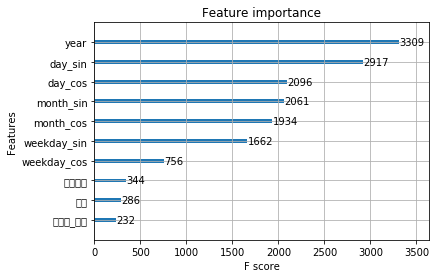

In [23]:
xgb.plot_importance(model,max_num_features=10)

In [24]:
dev_y.shape

(4002,)

In [25]:
pred.shape

(4002,)

/app/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


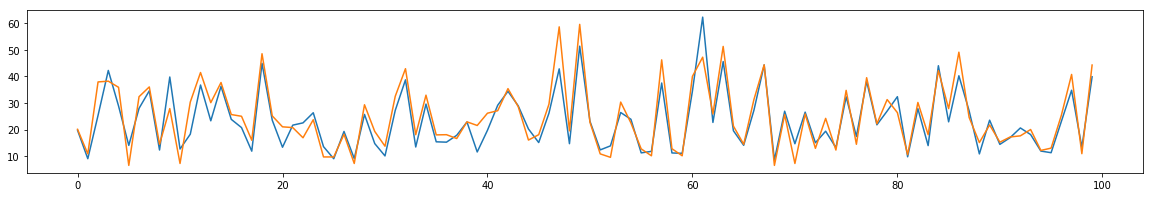

In [26]:
plt.rcParams["figure.figsize"] = (20,3)
index = 500

plt.plot(pred[index:index+100])
plt.plot(dev_y.values[index:index+100])